Let's begin with the standard imports!

In [1]:
import numpy as np       # For the math
import seaborn as sns    # To help your vision (I meant visualization)
from matplotlib import pyplot as plt    # visualization

We'll now load some data to test our implementation of dimensionality reduction on. The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


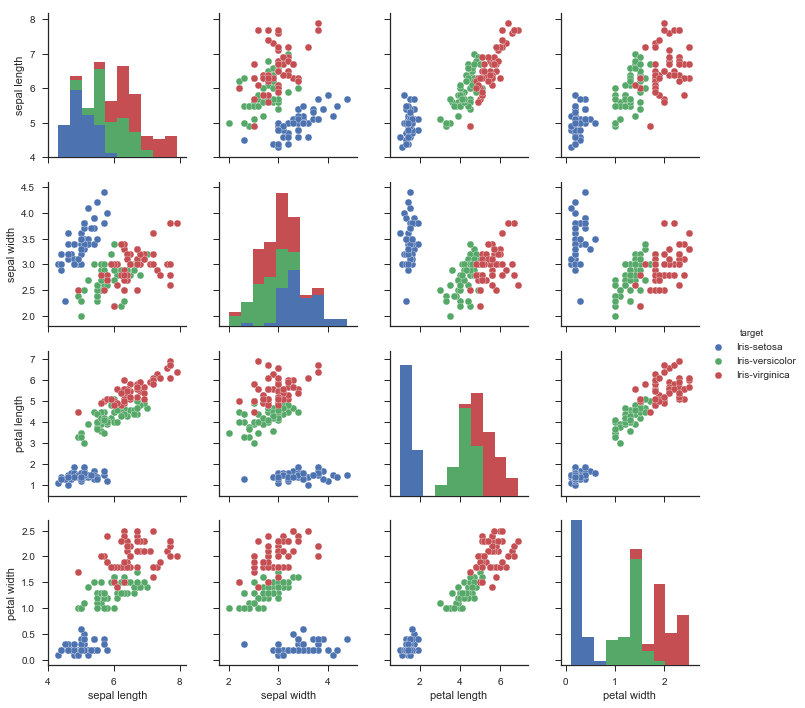

In [4]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="target")

As mentioned earlier, we'll have to scale the data as a prerequisite. We'll use StandardScaler to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1). Note that this is the requirement for the optimal performance of many machine learning algorithms other than PCA. 

You can refer to [this](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) to check out the consequences of not scaling the data!!

In [5]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
scaled_df = pd.DataFrame(x)
scaled_df.head(10)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


You can see the difference between original values of x and those after it's been standardized (or scaled). 

Let's now implement whatever math we learnt in the previous sections to reduce the dimensionality. Go down the memory lane and recollect:

Step 1. Covariance

Step 2. Eigen Decomposition

In [7]:
# THE WEAPONS!!!!!!. Math, you thought you could destroy us? Well, Ha!
#(I mean, import the numpy functions :P)

from numpy import cov
from numpy.linalg import eig 

# Covarinace
x_cov = cov(x.T) # Yeah, that simple
print("Covariance Matrix: ")
print(x_cov)
#EigenDecomposition
e_values, e_vectors = eig(x_cov)
print("EigenVectors: ")
print(e_vectors)
print("EigenValues: ")
print(e_values)

Covariance Matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
EigenVectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
EigenValues: 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [8]:
#Here's how you project data
P = e_vectors.T.dot(x.T)
print(P.T[:10])

[[-2.26454173 -0.5057039  -0.12194335  0.02307332]
 [-2.0864255   0.65540473 -0.22725083  0.10320824]
 [-2.36795045  0.31847731  0.05147962  0.02782523]
 [-2.30419716  0.57536771  0.09886044 -0.06631146]
 [-2.38877749 -0.6747674   0.02142785 -0.03739729]
 [-2.07053681 -1.51854856  0.03068426  0.00439877]
 [-2.44571134 -0.07456268  0.34219764 -0.03809657]
 [-2.23384186 -0.24761393 -0.08257446 -0.02550516]
 [-2.34195768  1.09514636  0.1535624  -0.02679383]
 [-2.18867576  0.44862905 -0.24655952 -0.0399073 ]]


That gives us the eigen vector projection for all the components. If you want for only n components (like you should, since PCA is used for Dim. Reduction), you need to drop some eigen vectors. In order to decide which eigen vector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues. The eigen vectors with the lowest eigenvalues contain the least information about the distribution of the data; those are the ones can be dropped. In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigen vectors. 

But before that, let's check the variance because of each component

In [9]:
variance = [(i / sum(e_values))*100 for i in sorted(e_values, reverse=True)]
print(variance)


[72.77045209380134, 23.030523267680632, 3.683831957627389, 0.5151926808906395]


As you can see, with largest eigen value, you can retain 72% variance. For data compression purpose, we generally go for 99% variance retention, while for visualization we make the dimension to 2 or 3. Let's take the top two vectors for our projection. the total variance that can be retained then is 95% as shown below. (I take the cumulative sum of the variance. Considering the top two it's 95%)

In [10]:
print(np.cumsum(variance))

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [11]:
e_vectors_n = np.hstack(((e_vectors.T)[0].reshape(4,1), 
                      (e_vectors.T)[1].reshape(4,1)))
print('N vectors:\n', e_vectors_n)

N vectors:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [12]:
#Projection
P_n = e_vectors_n.T.dot(x.T)
P_df = pd.DataFrame(P_n.T)
P_df.head(10)

,0,1
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767
5,-2.070537,-1.518549
6,-2.445711,-0.074563
7,-2.233842,-0.247614
8,-2.341958,1.095146
9,-2.188676,0.448629


Let's use these componenets to visualize our data based on classes

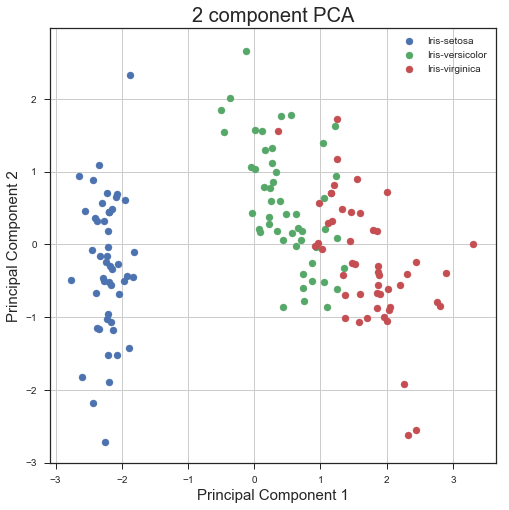

In [13]:
finalDf = pd.concat([P_df, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Yayyyyy!! We didt it. Implemented PCA from scratch. I hope you find it easy now. Let's do one final check of our implementation and compare our results with those from the pca function provided by scikit-learn

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
principalDf.head(10)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


There goes the first validation. Our values for both the components match. This in turn implies that the values for eigen vectors and variance must also be the same, still, let's make ourselves happier by validating those as well

In [16]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.72770452, 0.23030523])

Yay! Now let's compare eigen vectors

In [17]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])